In [1]:
'''
Data extracted from zip, then combined part 1 and part 2 into same folder "HAM10000_images" 
''';

In [ ]:
'''
ADD MORE:
* dx barplot for sourse of dx [DONE]
* age histogram [DONE]
* plot example data images [DONE]
* MAYBE resize images here [DONE]
''';

In [169]:
DATA_PATH = "../../Data/"
IMAGES_PATH = DATA_PATH + "HAM10000_images/"
IMAGES_PATH_SEPARATED = DATA_PATH+"HAM10000_images_separated/"

PERFORM_IMAGE_SEPARATION = False

In [170]:
import os
import shutil
import pandas as pd
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

## Image Separation
Separating images by class into different folders to simplify manual selection of images with hair.

In [177]:
df_meta = pd.read_csv(DATA_PATH+"HAM10000_metadata.csv")
df_meta

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [186]:
# Print Unique classes
class_names = df_meta.dx.unique()
class_names

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

* Actinic Keratoses
* Basal Cell Carcinoma
* Benign Keratosis
* Dermatofibroma
* Malignant Melanoma
* Melanocytic Nevi
* Vascular Lesions

In [172]:
if PERFORM_IMAGE_SEPARATION:
    # Create folder for every class
    for dx in df_meta.dx.unique():
        try:
            os.makedirs(IMAGES_PATH_SEPARATED+dx)
        except OSError:
            pass
    # Copy image into relevant folder
    for index, row in tqdm(df_meta.iterrows()):
        shutil.copy2(IMAGES_PATH+row.image_id+".jpg", IMAGES_PATH_SEPARATED+row.dx)

## EDA
Exploratory Data Analysis

Following info function output shows missing data in age column, but it makes no difference for current research as main interest are image_id and dx (diagnosis).

In [173]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [174]:
# Main interest is diagnosys and image_id, 
# other meta data, such as localization or age, is irrelevant to current research
data_dx = df_meta.dx.groupby(df_meta.dx).count()
data_dx

dx
akiec     327
bcc       514
bkl      1099
df        115
mel      1113
nv       6705
vasc      142
Name: dx, dtype: int64

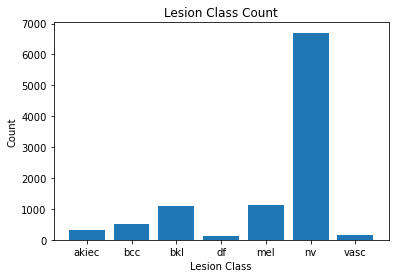

In [181]:
plt.bar(data_dx.index, data_dx.values)
plt.title("Lesion Class Count")
plt.xlabel("Lesion Class")
plt.ylabel("Count")
plt.show();

Here it can be seen that smalles underrepresented class "df" only has 115, while "nv" has 6705. There are 58.3 times more images of "nv" than there are images of "df". Aim is to bring data closer to ratio of 1, but with some data augmentation techniques it would not be possible, for example image can be only flipped in 3 different variations without repeats.

On other hand "mel" class has 1113 images and requires different number of augmentations of each type to reach "nv" size.

Should some augmentations be combined with each other to provide more variations and therefore decrease rаtio between "nv" and other classes?

How to deal with different number of augmentations needed? What is the aim? Same multiplier or same amount? And WHY???



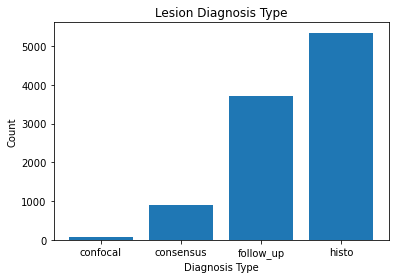

In [182]:
data_dx_type = df_meta.dx_type.groupby(df_meta.dx_type).count()
plt.bar(data_dx_type.index, data_dx_type.values)
plt.title("Lesion Diagnosis Type")
plt.xlabel("Diagnosis Type")
plt.ylabel("Count")
plt.show();

In figure above, count of types of Ground Truth is presented.
- Histopathology: performed by specialized dermatopathologists
- Follow-up: no changes shown in 3 follow-up visits, only applies to Nevi (nv)
- Consensus: expert consensus rating
- Confocal: Reflectance confocal microscopy imaging technique with a resolution at near-cellular level

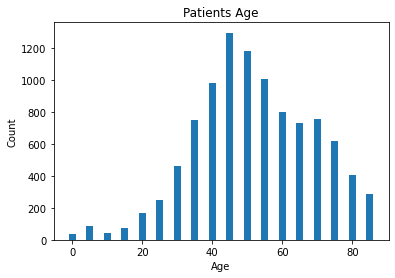

In [184]:
data_age = df_meta.age.groupby(df_meta.age).count()
plt.bar(data_age.index, data_age.values, width=2)
plt.title("Patients Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show();

From Figure above representing histogram of patients age, expectations about hair are made. As majority of population represented in HAM10000 are above mid-age, white hair are expected, same as black hair. Not all hair will be the same colour.

## Image Data Samples

                                                       bkl


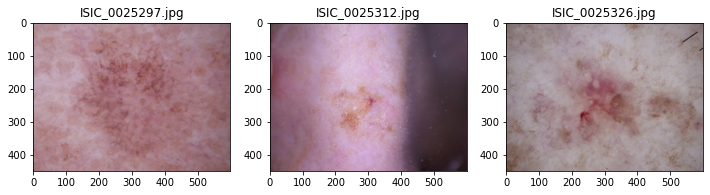

                                                       nv


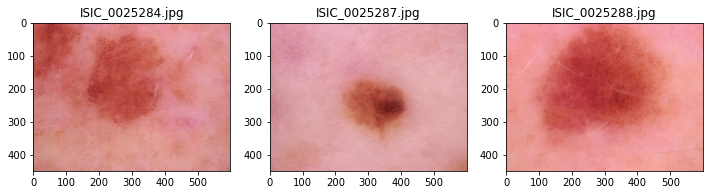

                                                       df


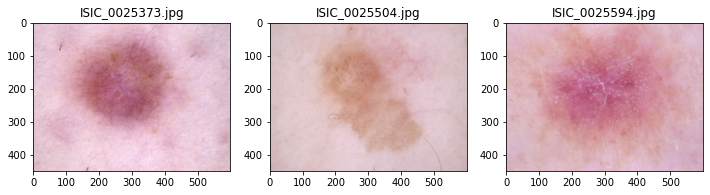

                                                       mel


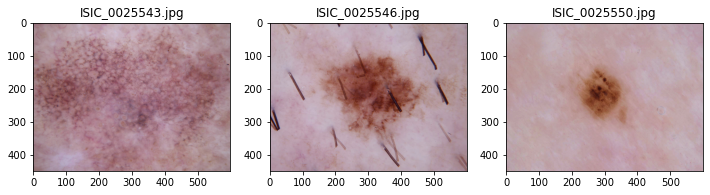

                                                       vasc


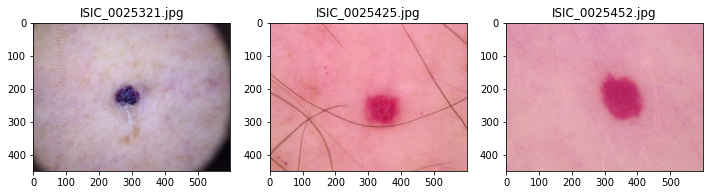

                                                       bcc


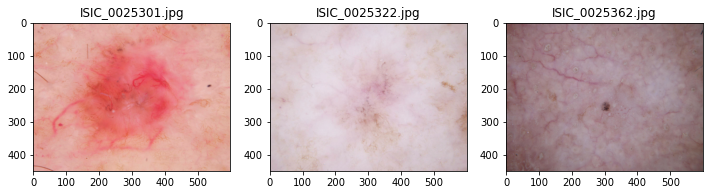

                                                       akiec


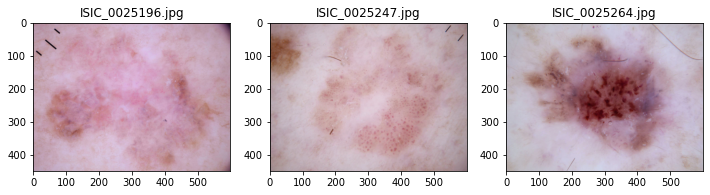

In [215]:
# Number of images to display for each class in one row
n = 3
# For every class
for class_name in class_names:
    # Search files in each class folder
    for (dirpath, dirnames, filenames) in walk(IMAGES_PATH_SEPARATED+class_name):
        # Print class name and display n images in a single row
        print("{:55}{}".format("",class_name))
        fig = plt.figure(figsize=(12,6))
        for i in range(n):
            img  = imread(dirpath+"/"+filenames[i], as_gray=False)
            ax  = fig.add_subplot(int("1{}{}".format(n,i+1)))
            ax.imshow(img)
            ax.set_title(filenames[i])
        plt.show()

In [9]:
'''
Hair Removal (Scikit image library?)
Rotation (6 degrees -> 60x, fill gaps with prevalent colour)
Cropping (pixels on side 5,10,15... (10x) crop bottop, add same to top or fill gaps with prevalent colour)
+
Flipping (H, V, H+V -> 3x)
Zooming (in: 102%,104%,106%,108%,110% -> 5x or 10x (120%) or 20x if negative zoom, squize to 30x )
Colour, Contrast, Brightness and Hue modification (?)

Generative Adversarial Networks (?)

1.
100  -> x30 -> 3000
500  -> x6  -> 3000
1000 -> x3  -> 3000
       -OR-
2.
100  -> x15 -> 1500
500  -> x15 -> 7500
1000 -> x15 -> 15000

Picking first option from above as otherwise same problem of underrepresentation persists.

akiec     327   -> x18  -> 5886
bcc       514   -> x12  -> 6168
bkl      1099   -> x6   -> 6594
df        115   -> x36  -> 4140  or x18 -> 2070
mel      1113   -> x6   -> 6678 
nv       6705   NA
vasc      142   -> x36  -> 5112  or x18 -> 2556

41,283 (34,578 without nv [if x18 29,952]) 

10% validation ?

MIN and MAX augmentation values will be the same, 
number of steps in the middle will be different for each class.

''';


Table below shows how many images with hair were found among each class with percentage. The core idea is to feed same amount of images to a neural network in first test (T1) and in second test (T2), with the difference of T1 has no hair images and T2 has images containing hair in the same proportion as original data classes. Then, once models are fitted, aim is to predict images having hair and observe the results. Initial assumption is T2 model would perform better in classification of images with hair and T1 would perform worse. That would ... in debate whether hair has to be removed from skin lesion images at all.


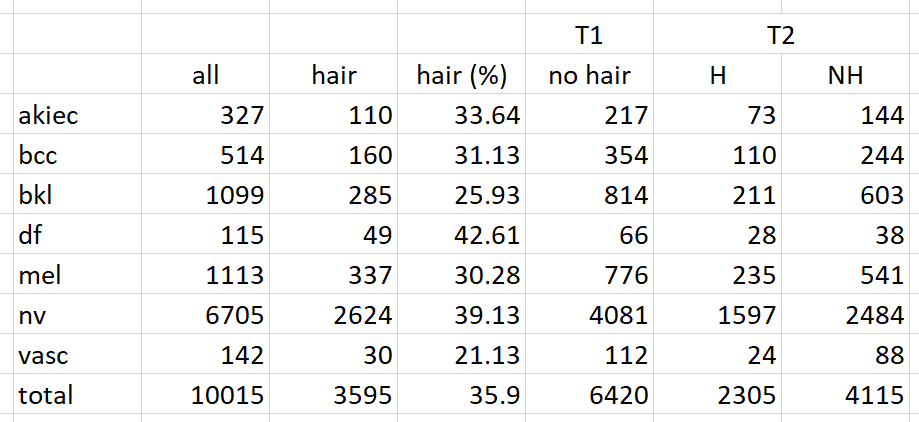

Table below shows different options considered in order to perform augmentation process. Second options N amplitude is less, and total number of images is less, in comparison. With original model training it was revealed that fitting takes even more time then expected. With increasing number of images fitting might take even more time. There are 5 models planned with 20K images, original model with 9K and 2 models for hair (T1 and T2) each with 6420 images. 8 models for CNN all together (+GAN model). KFolds iteration number was decreased from 10 to 5 to minimize time it takes for model training.

Each augmentation will produce same amount of data (total of 19190 images), this approach will allow to compare augmentations among each other and between original model.

* M for Multiplier
* N for Number of images

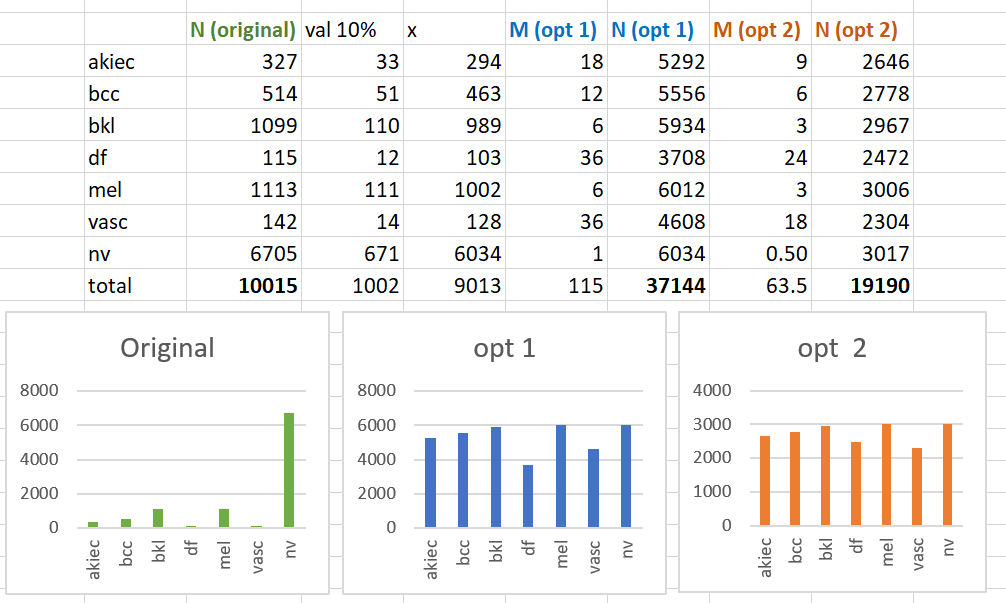

## Resize Images
After several atempts on CNN insuficient computing power was noticed, as one of the solutions resizing original images was implemented, first as TensorFlow layer to test and later converting all images to quarter of the size (1/4), allowing to fit simple CNN models within the timeframe allocated.

In [17]:
from skimage.transform import rescale
from skimage.io import imsave, imread
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import numpy as np

#### Display Anti-Aliasing

Difference between anti-aliasing enabled and disabled can be seen on images below. Choise is made towards disabling anti-aliasing as blur is making small details harder to see and therefore harder to distinguish.

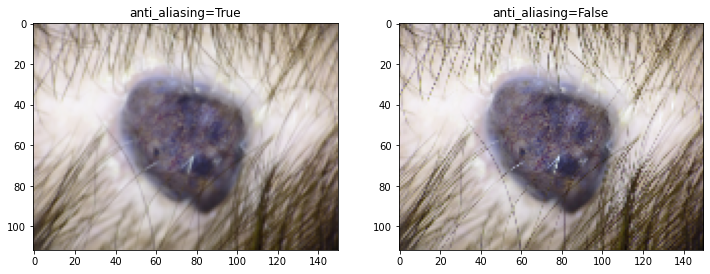

In [118]:
test_img_path = "../CNN/input/ISIC_0024891.jpg"

img = imread(test_img_path, as_gray=False)
img_rescaled_aa_true  = rescale(img, 0.25, anti_aliasing=True, multichannel=True)
img_rescaled_aa_false = rescale(img, 0.25, anti_aliasing=False, multichannel=True)

imsave("output/test_aa_true.png",  (img_rescaled_aa_true* 255).astype(np.uint8))
imsave("output/test_aa_false.png", (img_rescaled_aa_false*255).astype(np.uint8))

#fig, axes = plt.subplots(nrows=1, ncols=2)
fig = plt.figure(figsize=(12,6))
ax  = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax.imshow(img_rescaled_aa_true)
ax2.imshow(img_rescaled_aa_false)
ax.set_title("anti_aliasing=True")
ax2.set_title("anti_aliasing=False")

plt.show()

#### Rescale Image

In [154]:
def img_to_uint8(img: np.ndarray) -> np.ndarray:
    return (img* 255).astype(np.uint8)

In [117]:
def rescale_img(path: str) -> np.ndarray:
    # Read image from path and rescale using skimage by 0.25
    img = imread(path, as_gray=False)
    img_resized = rescale(img, 0.25, anti_aliasing=False, multichannel=True)
    return img_resized

In [112]:
train_img_path_in  = "../../Data/HAM10000_images_separated/"
train_img_path_out = "../../Data/HAM10000_images_separated_resized/"
val_img_path_in    = "../../Data/HAM10000_images_separated_validation/"
val_img_path_out   = "../../Data/HAM10000_images_separated_validation_resized/"

from os import walk
from tqdm import tqdm
import time
from datetime import timedelta

def rescale_all_img(path_in: str, path_out: str) -> None:
    # Measure time
    start_time = time.time()
    # Check folder within the path
    for (dirpath, dirnames, _) in walk(path_in):
        # For every folder within the path
        for directory in dirnames:
            curr_folder = "{}{}/".format(dirpath, directory)
            # Check files within the folder
            for (dirp, _, files) in walk(curr_folder):
                print("{:50}{:6}".format(dirp,len(files)))
                # For every file within the folder            
                for f in tqdm(files):
                    #print("{}{}".format(dirp,f))
                    # Resize image
                    img_path = "{}{}".format(dirp,f)
                    img = rescale_img(img_path)
                    # Save image, suppress low contrast warning
                    save_path = "{}{}/{}".format(path_out,directory,f)
                    imsave(save_path, img_to_uint8(img), check_contrast=False)
    print("Time Elapsed : ", timedelta(seconds=(time.time() - start_time)))

rescale_all_img(train_img_path_in, train_img_path_out)
rescale_all_img(val_img_path_in, val_img_path_out)

../../Data/HAM10000_images_separated/akiec/          294


100%|████████████████████████████████████████████████████████████████████████████████| 294/294 [00:05<00:00, 51.87it/s]


../../Data/HAM10000_images_separated/bcc/            463


100%|████████████████████████████████████████████████████████████████████████████████| 463/463 [00:08<00:00, 55.33it/s]


../../Data/HAM10000_images_separated/bkl/            989


100%|████████████████████████████████████████████████████████████████████████████████| 989/989 [00:18<00:00, 52.15it/s]


../../Data/HAM10000_images_separated/df/             103


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:01<00:00, 54.50it/s]


../../Data/HAM10000_images_separated/mel/           1002


100%|██████████████████████████████████████████████████████████████████████████████| 1002/1002 [00:18<00:00, 53.28it/s]


../../Data/HAM10000_images_separated/nv/            6034


100%|██████████████████████████████████████████████████████████████████████████████| 6034/6034 [02:00<00:00, 50.23it/s]


../../Data/HAM10000_images_separated/vasc/           128


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:02<00:00, 51.86it/s]


Time Elapsed :  0:02:56.351068
../../Data/HAM10000_images_separated_validation/akiec/    33


100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:00<00:00, 48.59it/s]


../../Data/HAM10000_images_separated_validation/bcc/    51


100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:01<00:00, 50.68it/s]


../../Data/HAM10000_images_separated_validation/bkl/   110


100%|████████████████████████████████████████████████████████████████████████████████| 110/110 [00:02<00:00, 42.33it/s]


../../Data/HAM10000_images_separated_validation/df/    12


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 54.20it/s]


../../Data/HAM10000_images_separated_validation/mel/   111


100%|████████████████████████████████████████████████████████████████████████████████| 111/111 [00:02<00:00, 41.83it/s]


../../Data/HAM10000_images_separated_validation/nv/   671


100%|████████████████████████████████████████████████████████████████████████████████| 671/671 [00:13<00:00, 48.37it/s]


../../Data/HAM10000_images_separated_validation/vasc/    14


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 47.42it/s]

Time Elapsed :  0:00:21.350757


## TEST

## Resize

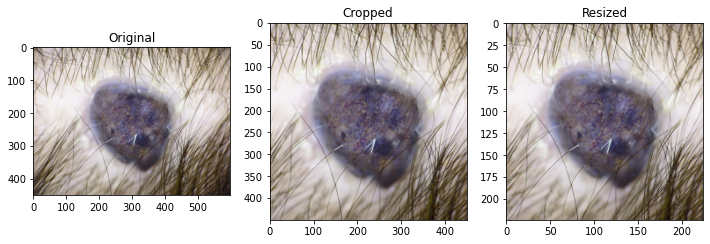

In [127]:
from skimage.transform import resize

test_img_path = "../CNN/input/ISIC_0024891.jpg"

img = imread(test_img_path, as_gray=False)
# To maintain aspect ratio before resizing image is cropped 
# from both sides(left and right) by 75 pixels
# width minus height then divided by 2 (600-450)/2=75
img_cropped = img[0:450,75:525]
img_resized = resize(img_cropped, (224,224), anti_aliasing=False)

#imsave("output/test_resize.png",  (img_resized_aa_true* 255).astype(np.uint8))

#fig, axes = plt.subplots(nrows=1, ncols=2)

fig = plt.figure(figsize=(12,6))
ax  = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax.imshow(img)
ax2.imshow(img_cropped)
ax3.imshow(img_resized)
ax.set_title("Original")
ax2.set_title("Cropped")
ax3.set_title("Resized")

#plt.imshow(img_resized)
plt.show()

In [155]:
def resize_img(path: str):
    img = imread(path, as_gray=False)
    # To maintain aspect ratio before resizing image is cropped 
    # from both sides(left and right) by 75 pixels
    # width minus height then divided by 2 (600-450)/2=75
    img_cropped = img[0:450,75:525]
    img_resized = resize(img_cropped, (224,224), anti_aliasing=False)
    return img_resized

## Apply defined Function to all images

In [136]:
train_img_path_in  = "../../Data/HAM10000_images_separated/"
train_img_path_out = "../../Data/HAM10000_images_separated_resized/"
val_img_path_in    = "../../Data/HAM10000_images_separated_validation/"
val_img_path_out   = "../../Data/HAM10000_images_separated_validation_resized/"

from os import walk
from tqdm import tqdm
import time
from datetime import timedelta

def apply_all_img(path_in: str, path_out: str, func) -> None:
    # Measure time
    start_time = time.time()
    # Check folder within the path
    for (dirpath, dirnames, _) in walk(path_in):
        # For every folder within the path
        for directory in dirnames:
            curr_folder = "{}{}/".format(dirpath, directory)
            # Check files within the folder
            for (dirp, _, files) in walk(curr_folder):
                print("{:50}{:6}".format(dirp,len(files)))
                # For every file within the folder            
                for f in tqdm(files):
                    #print("{}{}".format(dirp,f))
                    # Resize image
                    img_path = "{}{}".format(dirp,f)
                    img = func(img_path)
                    # Save image, suppress low contrast warning
                    save_path = "{}{}/{}".format(path_out,directory,f)
                    imsave(save_path, img_to_uint8(img, check_contrast=False)
                    
    print("Time Elapsed : ", timedelta(seconds=(time.time() - start_time)))

In [137]:
apply_all_img(train_img_path_in, train_img_path_out, resize_img) 

../../Data/HAM10000_images_separated/akiec/          294


100%|████████████████████████████████████████████████████████████████████████████████| 294/294 [00:08<00:00, 35.45it/s]


../../Data/HAM10000_images_separated/bcc/            463


100%|████████████████████████████████████████████████████████████████████████████████| 463/463 [00:13<00:00, 34.64it/s]


../../Data/HAM10000_images_separated/bkl/            989


100%|████████████████████████████████████████████████████████████████████████████████| 989/989 [00:32<00:00, 30.06it/s]


../../Data/HAM10000_images_separated/df/             103


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:03<00:00, 32.93it/s]


../../Data/HAM10000_images_separated/mel/           1002


100%|██████████████████████████████████████████████████████████████████████████████| 1002/1002 [00:30<00:00, 32.56it/s]


../../Data/HAM10000_images_separated/nv/            6034


100%|██████████████████████████████████████████████████████████████████████████████| 6034/6034 [03:08<00:00, 32.08it/s]


../../Data/HAM10000_images_separated/vasc/           128


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:03<00:00, 32.33it/s]

Time Elapsed :  0:04:40.567387


In [138]:
apply_all_img(val_img_path_in, val_img_path_out, resize_img)

../../Data/HAM10000_images_separated_validation/akiec/    33


100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:00<00:00, 35.27it/s]


../../Data/HAM10000_images_separated_validation/bcc/    51


100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:01<00:00, 32.46it/s]


../../Data/HAM10000_images_separated_validation/bkl/   110


100%|████████████████████████████████████████████████████████████████████████████████| 110/110 [00:03<00:00, 34.19it/s]


../../Data/HAM10000_images_separated_validation/df/    12


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 29.53it/s]


../../Data/HAM10000_images_separated_validation/mel/   111


100%|████████████████████████████████████████████████████████████████████████████████| 111/111 [00:03<00:00, 34.37it/s]


../../Data/HAM10000_images_separated_validation/nv/   671


100%|████████████████████████████████████████████████████████████████████████████████| 671/671 [00:20<00:00, 33.54it/s]


../../Data/HAM10000_images_separated_validation/vasc/    14


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 31.69it/s]

Time Elapsed :  0:00:29.889001


## Rotate
Preferable would be to rotate image and only then crop it to desired size (224,224) to maintain more data, as can be seen in example below.

Text(0.5, 1.0, 'Rotate then Crop')

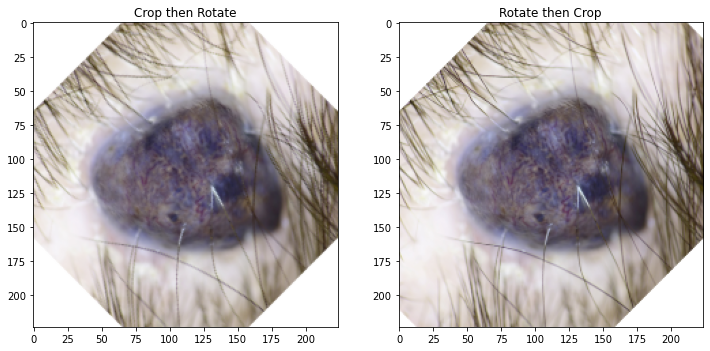

In [166]:
# Rotate already resized image
img_resized = resize_img(test_img_path)
img_rotated = rotate(img_resized, 45, cval=1) # cval is BG color value

# Rotate image first then resize it
img = imread(test_img_path, as_gray=False)
img_rotated2 = rotate(img, 45, cval=1) # cval is BG color value
img_rotated2 = img_rotated2[0:450,75:525]
img_rotated2 = resize(img_rotated2, (224,224), anti_aliasing=False)

# Plot images
fig = plt.figure(figsize=(12,6))
ax  = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax.imshow(img_rotated)
ax2.imshow(img_rotated2)
ax.set_title("Crop then Rotate")
ax2.set_title("Rotate then Crop")

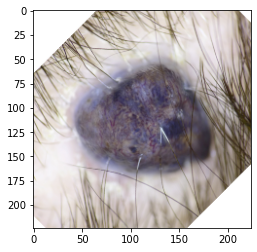

In [167]:
from skimage.transform import rotate

def rotate_img(path: str="../CNN/input/ISIC_0024891.jpg", degrees: int=45) -> np.ndarray:
    # Rotate image first then resize it
    img = imread(test_img_path, as_gray=False)
    img_rotated = rotate(img, 45, cval=1) # cval is BG color value
    img_rotated = img_rotated[0:450,75:525]
    img_rotated = resize(img_rotated2, (224,224), anti_aliasing=False)

    return img_rotated #(img_resized* 255).astype(np.uint8)

#plt.imshow(rotate_img())